In [ ]:
#Here we have done a custom implementation of sklearn's RandomizedSearchCV.
#Below is the official documentation
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
# We use the K-Nearest-Neighbors algorithm whose hyperparamters are tested to check for  the implementation of our custom randomizedsearchCV.

In [ ]:
import numpy as np
from tqdm import tqdm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random


In [ ]:
x,y = make_classification(n_samples=10000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=60)
x_train,x_test,y_train,y_test= train_test_split(x,y,stratify=y,random_state=42)

print(y_train,y_test)

[0 0 1 ... 0 1 0] [0 1 0 ... 1 0 0]


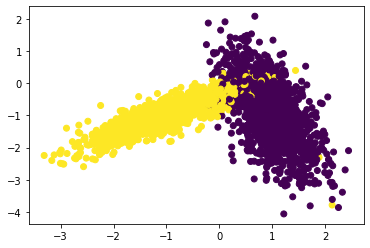

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red',1:'blue'}
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.show()
#here we get the plot of datapoints 

In [ ]:
def get_param_list(params_range):
  param_list = random.sample(range(1, params_range),10)
  param_list.sort()
  return param_list

In [ ]:
def randomsearchCV(x_train,y_train,classifier,params,folds):
  trainscores=[]
  testscores=[]

  parameters=get_param_list(params)
  print(parameters)  #this will show us the list of parameter values

  params={'n_neighbors' : parameters}  #all the neighbor values will be stored in n_neighbors and can be called using that name
  for k in tqdm(params['n_neighbors']):
    trainscores_folds=[]  #stores the train score values for each folds
    testscores_folds=[]    #stores the test score values for each folds

    for j in range(0,folds):
      values= int(len(x_train)/ (folds))   ##here is when the  train data is divided into the fold number of groups

      test_indices=list(set(list(range((values*j), (values*(j+1))))))
      train_indices=list(set(list(range(0, len(x_train)))) - set(test_indices))
      X_train = x_train[train_indices]  #now that we have the indices of the of point we select those train and test points
      Y_train = y_train[train_indices]
      X_test  = x_train[test_indices]
      Y_test  = y_train[test_indices]
      classifier.n_neighbors=k
      classifier.fit(X_train,Y_train)
      Y_pred=classifier.predict(X_test)
      testscores_folds.append(accuracy_score(Y_test,Y_pred))
      Y_pred=classifier.predict(X_train)
      trainscores_folds.append(accuracy_score(Y_train,Y_pred))
    trainscores.append(np.mean(np.array(trainscores_folds)))
    testscores.append(np.mean(np.array(testscores_folds)))
  return trainscores,testscores,params      

[3, 5, 7, 13, 14, 17, 21, 26, 43, 49]


100%|██████████| 10/10 [00:17<00:00,  1.76s/it]

[0.9680666666666666, 0.9624666666666667, 0.9606666666666666, 0.9580666666666667, 0.9581333333333334, 0.9580666666666667, 0.9576666666666668, 0.9574666666666666, 0.9578000000000001, 0.9575333333333335]
****************************************
[0.9473333333333334, 0.9500000000000001, 0.9528, 0.9554666666666667, 0.9556, 0.9542666666666667, 0.9554666666666667, 0.9565333333333333, 0.9571999999999999, 0.9574666666666666]
****************************************
{'n_neighbors': [3, 5, 7, 13, 14, 17, 21, 26, 43, 49]}
****************************************


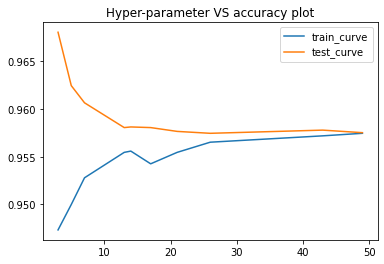

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
classifier=KNeighborsClassifier()
params_range=50
folds=3
testscores,trainscores,params= randomsearchCV(x_train,y_train,classifier,params_range,folds)
print(testscores)
print("*"*40)
print(trainscores)
print("*"*40)
print(params)
print("*"*40)
plt.plot(params['n_neighbors'],trainscores,label='train_curve')
plt.plot(params['n_neighbors'],testscores,label='test_curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

Here, we can see that the test error drops drastically at around 13 and also is the lowest around 49. So, we take these two as our best hyperparamter values.

In [ ]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

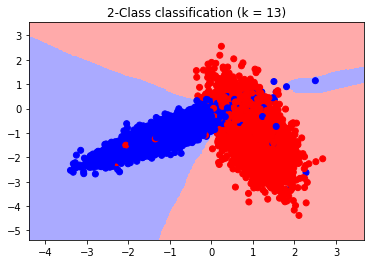

In [ ]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 13)
neigh.fit(x_train, y_train)
plot_decision_boundary(x_train[:, 0], x_train[:, 1], y_train, neigh)

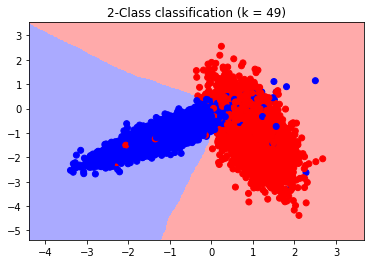

In [ ]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 49)
neigh.fit(x_train, y_train)
plot_decision_boundary(x_train[:, 0], x_train[:, 1], y_train, neigh)